In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd


In [19]:
df = pd.read_csv('test_datei.csv')  # Standardmäßig wird das Komma als Trennzeichen verwendet
df.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Month,Loan,Spent,ValuePayments,Sex
0,23,6.0,19114.12,1824.843333,3,4,3,4,3,8.0,...,0,49.574949,178.344067,244.565317,2,271.0,4,0.0,0.0,1.0
1,28,14.0,34847.84,3037.986667,2,4,6,1,7,1.0,...,0,18.816215,40.391238,484.591214,2,320.0,1,1.0,2.0,1.0
2,28,14.0,34847.84,3037.986667,2,4,6,1,3,1.0,...,0,18.816215,130.115420,444.867032,2,323.0,1,0.0,0.0,1.0
3,28,14.0,34847.84,3037.986667,2,4,6,1,3,0.0,...,0,18.816215,43.477190,481.505262,2,324.0,1,1.0,2.0,1.0
4,28,14.0,34847.84,3037.986667,2,4,6,1,3,4.0,...,0,18.816215,218.904344,356.078109,2,326.0,1,0.0,0.0,1.0


<Axes: xlabel='Sex'>

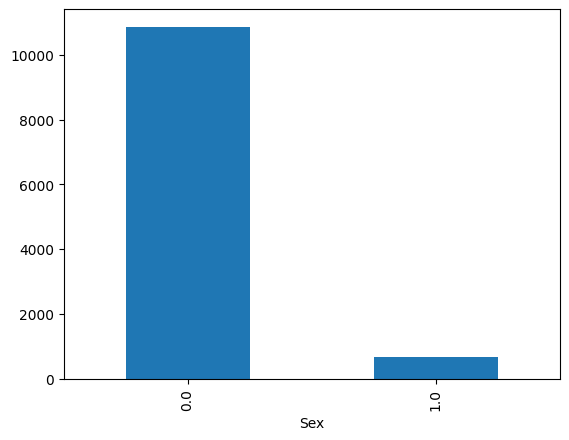

In [20]:
import pandas as pd
import numpy as np


# Zähle die "männlich"-Einträge
maennlich_count = df[df['Sex'] == 1].shape[0]

# Bestimme, wie viele "männlich"-Einträge geändert werden sollen (80%)
to_change = int(maennlich_count * 0.9)

# Zufällig 80% der "männlich"-Einträge auswählen und auf "weiblich" setzen
indices_to_change = df[df['Sex'] == 1].sample(n=to_change, random_state=42).index
df.loc[indices_to_change, 'Sex'] = 0

# Ergebnis anzeigen
# df['Sex'].plot(kind='bar')
sex_counts = df['Sex'].value_counts()
sex_counts.plot(kind='bar')


In [21]:
df['Credit_Score'].unique()

array([2, 1, 0])

In [22]:
y = df['Credit_Score']  
X = df.drop('Credit_Score', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler nur auf die Features anwenden
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from keras.utils import to_categorical

# One-Hot-Encoding der Zielvariable
y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)


In [24]:
X.shape

(11539, 24)

In [25]:
# Modell definieren
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(24,)),  
    layers.Dropout(0.5),  
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.5),  
    layers.Dense(3, activation="softmax")  
])

# Modell kompilieren
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Training starten
model.fit(X_train_scaled, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_scaled, y_test_encoded))


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 805us/step - accuracy: 0.4701 - loss: 1.0446 - val_accuracy: 0.5542 - val_loss: 0.8373
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.5802 - loss: 0.8623 - val_accuracy: 0.5715 - val_loss: 0.8159
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.5948 - loss: 0.8360 - val_accuracy: 0.5919 - val_loss: 0.8052
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.5926 - loss: 0.8177 - val_accuracy: 0.6023 - val_loss: 0.7861
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.5954 - loss: 0.8073 - val_accuracy: 0.6209 - val_loss: 0.7778
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - accuracy: 0.6058 - loss: 0.8028 - val_accuracy: 0.6261 - val_loss: 0.7713
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.6085 - loss: 0.7893 - val_accuracy: 0.6313 - val_loss: 0.7660
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.6137 - loss: 0.7737 - val_accurac

In [26]:
# Modell evaluieren
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_encoded)
print(f"Test Accuracy: {test_acc:.4f}")

73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 231us/step - accuracy: 0.6566 - loss: 0.7350
Test Accuracy: 0.6564


In [27]:
# Vorhersagen für das Testset
y_pred_proba = model.predict(X_test_scaled)
y_pred = y_pred_proba.argmax(axis=1)  # Umwandlung von Wahrscheinlichkeiten in Vorhersagen
# group_variable = df['Sex']


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step


In [28]:
X_test_results = X_test.copy()  
X_test_results["Predicted"] = y_pred 


In [29]:
# Statistical Parity: 

p_positive_male = X_test_results[X_test_results['Sex'] == 1]['Predicted'].mean()
p_positive_female = X_test_results[X_test_results['Sex'] == 0]['Predicted'].mean()

group_stats = X_test_results.groupby('Sex')['Predicted'].mean()
statistical_parity = group_stats[0] - group_stats[1]
statistical_parity

# statistical_parity = p_positive_male - p_positive_female
# print(f"P(positiv | männlich): {p_positive_male:.2f}")
# print(f"P(positiv | weiblich): {p_positive_female:.2f}")
# print(f"Statistical Parity Difference: {statistical_parity:.2f}")


0.08939805547612234